In [2]:
from drawModule import *

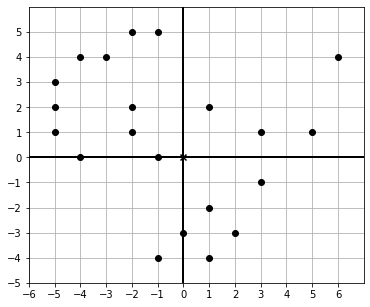

In [3]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
               (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
               (-1,-4), (1,-4), (2, -3), (1,-2), (3,-1), (5,1)]


draw(
    Points(*dino_vectors)
)

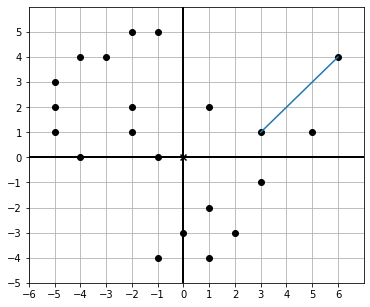

In [4]:

draw(
    Points(*dino_vectors),
    Segment((6, 4), (3, 1))
)

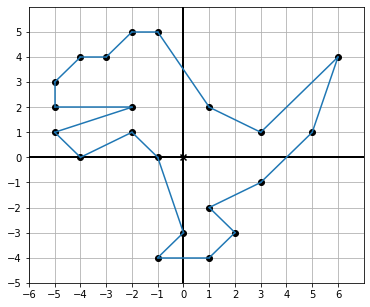

In [5]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

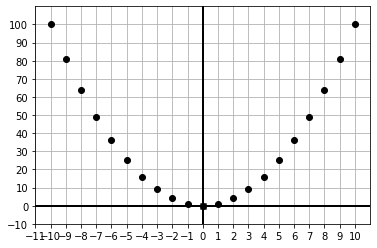

In [6]:
draw(
    Points(*[(x,x**2) for x in range(-10,11)]),
    grid=(1,10),
    nice_aspect_ratio=False
    )

In [7]:
def add(v1, v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

In [8]:
dino_vectors2 = [add((-1.5, -2.5), v) for v in dino_vectors]

dino_vectors2[:4]

[(4.5, 1.5), (1.5, -1.5), (-0.5, -0.5), (-2.5, 2.5)]

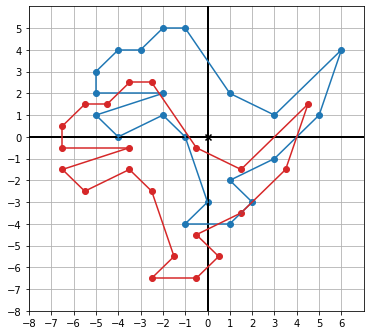

In [9]:
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
)

In [10]:
from math import sqrt

def length(v):
    return sqrt(v[0]**2 + v[1]**2)

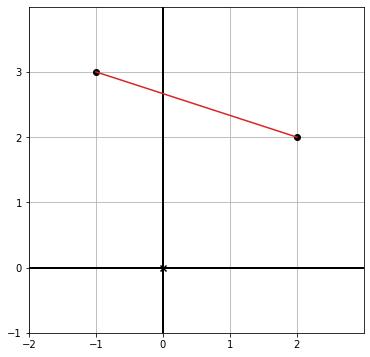

In [11]:
draw(
    Points((2,2), (-1,3)),
    Segment((2,2), (-1,3), color=red)
)

In [12]:
# Implement a revisd ass function that takes any number of vctors as an argument:

def add(*vectors):
    return(sum([v[0] for v in vectors]), sum([v[1] for v in vectors]))

In [13]:
"""
Write a fucntion translate(translation, vectors)
takes a translation vector and list of input vectors.
returning a list of the translated   input vectors
"""


def translate(translation, vectors):
    return [add(translation, v) for v in vectors]

                               

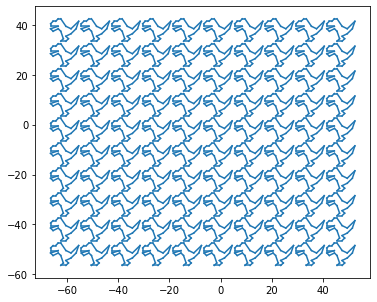

In [14]:
# 100 dinosaurs. 

def hunderd_dinos():
    translations = [(12*x,10*y)
                    for x in range(-5,5)
                    for y in range(-5,5)]
    dinos = [Polygon(*translate(t, dino_vectors2), color=blue)
            for t in translations]
    draw(*dinos, grid=None, axes=None, origin=None)
    
hunderd_dinos()

In [15]:
# Exercise Write a python function scale(s,v) that multiplies the inout vector v by input scalar

def scale(scalar,v):
    return (scalar * v[0], scalar * v[1])

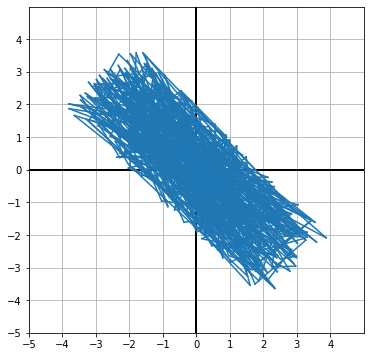

In [16]:
from random import uniform

u = (-1,1)

v = (1,1)

def random_r():
    return uniform(-3,3)

def random_s():
    return uniform(-1,1)

possibilities = [add(scale(random_r(), u), scale(random_s(), v))
                 for i in range(0,500)]

draw(Polygon(*possibilities),
    
)

In [17]:
possibilities[:5]

[(-3.218634760960178, 2.6846998580727224),
 (-1.7110858177603328, 0.661118373586181),
 (-1.037110919847131, -0.959552240638784),
 (0.12872488468386578, -1.1014659715141253),
 (-1.6301879616234531, 0.6690517677053043)]

In [18]:
# Write a Py function subtract(v1,v2) that returns the reslut of v1-v2 that returns the result of v1-v2 taking two 2d vectors as inputs
# and returns a 2d vector as an output

# Solution 

def subtract(v1,v2):
    return (v1[0] - v2[0], v1[1] - v2[1])


# Write a Py function distance(v1,v2) taht returns the distance between two input vectors

def distance(v1,v2):
    return length(subtract(v1, v2))


# For the perimeter, we sum the diatances of every pair of subsequent vectors in the list, as well as the pair of the first and the last vectors

def perimiter(vectors):
    distances = [distance(vectors[i], vectors[(i+i)%len(vectors)])
                 for i in range(0, len(vectors))]
    return sum(distances)

# Let u be the vector1 (1,-1) v vector2 (n,m) such that n > m has a distance of 13 from u. 
# What is the displacement from u to v

display(perimiter([(1,0), (1,1), (0,1), (0,0)]))

perimiter(dino_vectors)

3.414213562373095

100.48826936321181

In [19]:
for n in range(-12, 15):
    for m in range(-14, 13):
        if distance((n,m), (1,-1)) == 13 and n > m > 0:
            print((n,m))

(13, 4)


In [20]:
# Radians and trigonometry in python

# 1 radian ~ = 57.296*

# (pi) radians = 180*

# 2(pi) radians = 360*

'''
Some more suggestive relationshiops between degrees and radians are given in terms of the special number (pi),
    whose value is approximately 3.14159. (pi) radians = 180* / 2(pi) radians = 360*.
        In radians, half a trip around a circle is an angle of (pi) and a whole revolution is 2(pi)
            These respectively agree with the half and whole circumference of a circle of radius 1.
                45* =  (pi)/4(radians)
'''



from math import tan, pi, sin, cos, asin, sqrt  

tan(45)

1.6197751905438615

In [21]:
# this function to write a to_cartesian function.
# takes a paif of polar coordinates and returning corresponding Cartesion coordinates:

def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    return (length*cos(angle), length*sin(angle))

# Testing this, we can verify that 5 units at an angle of 37* gets us close to the point (4,3)

angle = 37*pi/180 

to_cartesian((5, angle))

# The math.atan2 function takes the Cartesian coordinates of a point in the plane (in reverse order!)
#   and gives you back the angle at which it liess.

from math import atan2

atan2(3, -2)

2.158798930342464

In [22]:
# Summary 

"""
Trignometric functions are tricky to do in reverse; multiple different inputs can produce the same output
so the outputs cannot be tracked back to a unique input. This lets us complete the function we set out to write:
This lets us complete the function we set out to write:
A converter from Cartesian to polar coordinates:
"""


def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y, x)
    return (length(vector), angle)

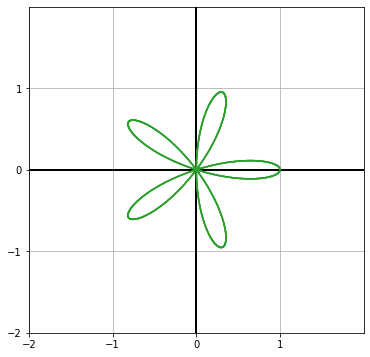

In [23]:

# The following list conprehension creates 1,000 points in polar coordinates:

[(cos(5*x*pi/5000.0), 2*pi/1000.0) for x in range(0,1000)][:5]

# convert these to cartisian coordinates and connect them in a close loop with line sesgments to draw a picture 

poolar_coords = [(cos(x*pi/100.0), 2*pi*x/1000.0) for x in range(0,1000)]

vectors = [to_cartesian(p) for p in poolar_coords]
draw(Polygon(*vectors, color=green))

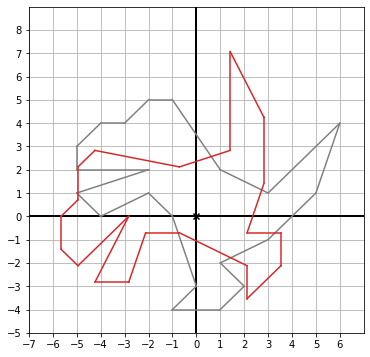

In [24]:
rotation_angle = pi/4 

dino_polar = [to_polar(v) for v in dino_vectors]

dino_rotated_polar = [(l, angle + rotation_angle) for l, angle in dino_polar]

dino_rotated = [to_cartesian(p) for p in dino_rotated_polar]

draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*dino_rotated, color=red)
)

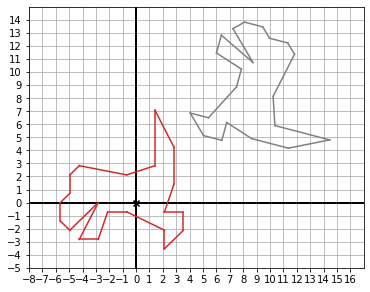

In [27]:
# The full power of these vector transformations comes when we apply them in sequence

new_dino = translate((8,8), rotate(5 * pi/3, dino_vectors))


draw(
    Polygon(*new_dino, color=gray),
    Polygon(*dino_rotated, color=red)
)

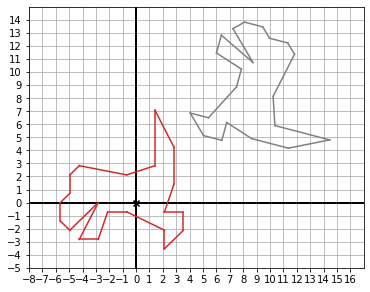

In [38]:
# A function that takes an array of input vectors in Cartesian coordinates and rotates those by the specified angle
    #  (counterclockwise or clockwise, according to whether the angle is positive or negative)

def rotate(angle, vectors):
    polars = [to_polar(v) for v in vectors]
    return [to_cartesian((1, a+angle)) for l,a in polars]


angle = 37*pi/360 


def newhype():
    rotate(angle, new_dino)
    draw(
    Polygon(*new_dino, color=gray),
    Polygon(*dino_rotated, color=red)
)


newhype()